# Data Visualization with Python 

### A survey was conducted to gauge an audience interest in different data science topics, namely:

1. Big Data (Spark / Hadoop)
2. Data Analysis / Statistics
3. Data Journalism
4. Data Visualization
5. Deep Learning
6. Machine Learning

The participants had three options for each topic: Very Interested, Somewhat interested, and Not interested. 2,233 respondents completed the survey.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

Reading csv file.

In [2]:
filename = 'https://cocl.us/datascience_survey_data'
df = pd.read_csv(filename, index_col = 0)

In [3]:
df.head()

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


In [4]:
df_a = df.sort_values(['Very interested'], axis=0, ascending = False).copy()
df_a
##df_top15=df_can.sort_values(['Total'], ascending = False,axis=0).head(15)

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [24]:
##Checking types
df_a.dtypes
# type(df_a)

Very interested        int64
Somewhat interested    int64
Not interested         int64
dtype: object

In [83]:
# df_a['Total'] = df_a.sum(axis=0)
# df_a.drop('Total',inplace=True,axis=1)
# df_a = pd.DataFrame(df_a)
# df_a['Total'] = df_a.sum(axis=1)
dfqq = pd.DataFrame(df_a.sum(axis=0))
dtr = dfqq.transpose()
# type(dfqq)
dtr

,Very interested,Somewhat interested,Not interested
0,7681,4235,1109


In [5]:
df_ap = df_a.copy()
df_ap

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [6]:
#Create a percentage matrix
for index, row in df_a.iterrows(): 
#     print (index,row["Very interested"],row["Somewhat interested"], row["Not interested"])     
    res1= (df_a.loc[index]['Very interested']/2233)*100    
    df_ap.loc[index]['Very interested'] = round(res1,2)
    
    res2= (df_a.loc[index]['Somewhat interested']/2233)*100    
    df_ap.loc[index]['Somewhat interested'] = round(res2,2)
    
    res3= (df_a.loc[index]['Not interested']/2233)*100    
    df_ap.loc[index]['Not interested'] = round(res3,2)
#     print(index,res1,res2,res3)
# df_a
# row['Very interested']
df_ap

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75,19,2
Machine Learning,72,21,3
Data Visualization,60,32,4
Big Data (Spark / Hadoop),59,32,5
Deep Learning,56,34,6
Data Journalism,19,48,27


In [7]:
# reset index without removing default index 
df_a.reset_index( inplace = True) 
df_a.index = df_a.index.map(int)
df_a
# x_axis = df_a['index']
# x_axis
# df_a.iloc[:,0]

,index,Very interested,Somewhat interested,Not interested
0,Data Analysis / Statistics,1688,444,60
1,Machine Learning,1629,477,74
2,Data Visualization,1340,734,102
3,Big Data (Spark / Hadoop),1332,729,127
4,Deep Learning,1263,770,136
5,Data Journalism,429,1081,610


In [8]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

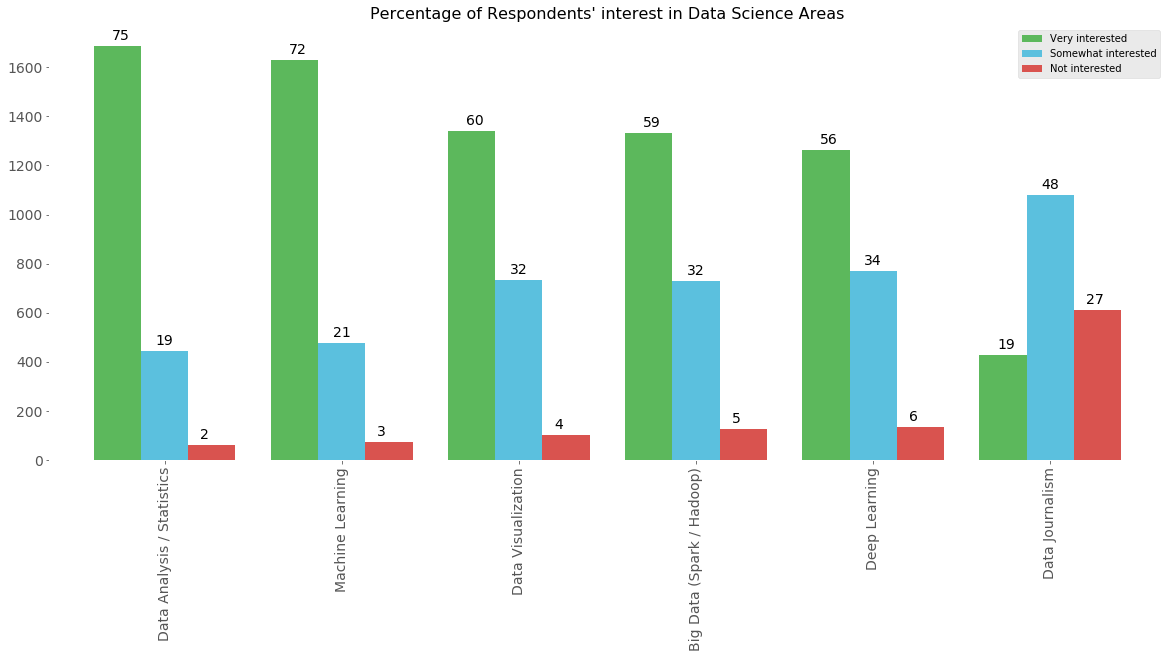

In [9]:
# creating plot
ax = df_a.plot(kind='bar',
               figsize = (20,8), 
               width=0.8,
               color=['#5cb85c', '#5bc0de', '#d9534f'])

ax.set_xticklabels(df_a.iloc[:,0])
# Set the font name for axis tick labels to be font size =14 or font type as Comic Sans
for tick in ax.get_xticklabels():
    tick.set_fontsize("14")  
#     tick.set_xticklabels("hello")
for tick in ax.get_yticklabels():
    tick.set_fontsize("14")
    
    
# Setting title
ax.set_title("Percentage of Respondents' interest in Data Science Areas", fontsize =16)

# Setring percentages on bars
# annotate value labels to each country
# for index, value in enumerate(df_a): 
#     label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
# plt.annotate('111', xy=(1700 - 47000, index - 0.10), color='white')
# plt.annotate('50', xy=(500 - 47000, index - 0.10), color='white')

# ax.annotate('0.25 on axes', (0.25, 0.25), textcoords='axes fraction', size=20)
# ax.annotate('0.25 on data', (0.25, 0.25), textcoords='data', size=20)
# ax.annotate('0.25 on axes', (0.0015, 0.25),  size=20)
# ax.annotate('text', (0.95, 480),  size=14)
# ax.annotate('text', (3, 770),  size=14)

# plt.text(-0.34,1700,"Text")
# plt.text(-0.06,450,"Text")
# plt.text(0.22,70,"Text")
# plt.show()

for index, row in df_a.iterrows(): 
    ax.annotate(df_ap.iloc[index]['Very interested'], (index-.3, df_a.iloc[index]['Very interested']+25),  size=14)
    ax.annotate(df_ap.iloc[index]['Somewhat interested'], (index-.05, df_a.iloc[index]['Somewhat interested']+25),  size=14)
    ax.annotate(df_ap.iloc[index]['Not interested'], (index+.2, df_a.iloc[index]['Not interested']+25),  size=14)
    
# ax.axis('off')
ax.set_facecolor('white')

In [10]:
df_ap

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75,19,2
Machine Learning,72,21,3
Data Visualization,60,32,4
Big Data (Spark / Hadoop),59,32,5
Deep Learning,56,34,6
Data Journalism,19,48,27


In [12]:
for index, row in df_a.iterrows(): 
    print (index)
    print (row["Very interested"], row["Somewhat interested"], row['Not interested']) 
     

0
1688 444 60
1
1629 477 74
2
1340 734 102
3
1332 729 127
4
1263 770 136
5
429 1081 610


In [11]:
filename_crimes = 'https://cocl.us/sanfran_crime_dataset'
# df_crimes = pd.read_csv(filename_crimes, index_col = 0)
df_crimes = pd.read_csv(filename_crimes)
df_map = df_crimes.copy()
df_crimes.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [12]:
df_crimes.head()
# d=pd.DataFrame(df_crimes['PdDistrict'].value_counts()).copy()
# d

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [18]:
# dqf_crimes.head()
# df_crimes.set_index("IncidntNum",inplace = True)
# df_crimes.index = df_crimes.index.map(int)
# df_crimes.reset_index( inplace = True) 
# dqf_crimes.head()
# dfc = pd.DataFrame(dqf_crimes[['PdDistrict','PdId']]).copy()
# dfc.head()
dfres=pd.DataFrame(df_crimes['PdDistrict'].value_counts()).copy()
dfres.reset_index(inplace=True)
dfres

,index,PdDistrict
0,SOUTHERN,28445
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303
5,INGLESIDE,11594
6,TARAVAL,11325
7,TENDERLOIN,9942
8,RICHMOND,8922
9,PARK,8699


In [19]:
##Checking types
# dfres.dtypes
# type(dfres)
# dfres = dfres.sort_values(['PdDistrict'], ascending = False,axis=0)
dfres.rename(columns = {'PdDistrict':'DISTRICT','index':'Neighborhood'}, inplace = True) 
# dfres =dfres[['Neighborhood','DISTRICT']]
dfres

,Neighborhood,DISTRICT
0,SOUTHERN,28445
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303
5,INGLESIDE,11594
6,TARAVAL,11325
7,TENDERLOIN,9942
8,RICHMOND,8922
9,PARK,8699


,Neighborhood,Count
0,SOUTHERN,28445
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303
5,INGLESIDE,11594
6,TARAVAL,11325
7,TENDERLOIN,9942
8,RICHMOND,8922
9,PARK,8699


# Making chloropleth

In [15]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be 

In [58]:
# define the world map
world_map = folium.Map()

# display world map
world_map

In [19]:
# define the world map centered around San Fracisco with a low zoom level
lat=37.7749
long=-122.4194
world_map = folium.Map(location=[lat,long], zoom_start=12)

# display world map
world_map

In [42]:
# file_geojson = 'https://cocl.us/sanfran_geojson'
# # download countries geojson file
# !wget --quiet file_geojson -O sanfran.json
# # file_geojson 

!wget --quiet https://cocl.us/sanfran_geojson -O sanfran.json
    
world_geo = r'sanfran.json' # geojson file

print('GeoJSON file downloaded!')
# world_geo

'sanfran.json'

In [28]:
# create a plain world map
world_map = folium.Map(location=[37.7749,-122.4194], zoom_start=12, tiles='Mapbox Bright')
# df_map['PdDistrict']

In [38]:
# dfres.index = dfres.Neighborhood
dfres.rename(columns = {'Neighborhood':'DISTRICT','DISTRICT':'Count'}, inplace = True) 
dfres.head()

,DISTRICT,Count
Neighborhood,,
SOUTHERN,SOUTHERN,28445
NORTHERN,NORTHERN,20100
MISSION,MISSION,19503
CENTRAL,CENTRAL,17666
BAYVIEW,BAYVIEW,14303


In [44]:
# generate choropleth map using the Crime rate San Francisco.
world_geo = r'sanfran.json' # geojson file
# df_map['Total'] = df_map.sum()
# create a numpy array of length 6 and has linear spacing from the minium total crimes to the maximum total crimes
# threshold_scale = np.linspace(df_map['Total'].min(),
#                               df_map['Total'].max(),
#                               6, dtype=int)
# threshold_scale = threshold_scale.tolist() # change the numpy array to a list
# threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map.choropleth(
    geo_data=world_geo,
    data=dfres,
    columns=['DISTRICT','Count'],
    key_on='features.properties.DISTRICT',
#     threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime rates in San Francisco',
    reset=True
)


# df_map.head()

# display map
world_map

AttributeError: 'NoneType' object has no attribute 'get'

In [41]:
dfres.head()

,DISTRICT,Count
Neighborhood,,
SOUTHERN,SOUTHERN,28445
NORTHERN,NORTHERN,20100
MISSION,MISSION,19503
CENTRAL,CENTRAL,17666
BAYVIEW,BAYVIEW,14303


In [45]:
sf_neighborhood_geo = 'https://cocl.us/sanfran_geojson'
sf_input = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')
sf = sf_input.groupby('PdDistrict').count()
sf.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,Resolution,Address,X,Y,Location,PdId
PdDistrict,,,,,,,,,,,,
BAYVIEW,14303,14303,14303,14303,14303,14303,14303,14303,14303,14303,14303,14303
CENTRAL,17666,17666,17666,17666,17666,17666,17666,17666,17666,17666,17666,17666
INGLESIDE,11594,11594,11594,11594,11594,11594,11594,11594,11594,11594,11594,11594
MISSION,19503,19503,19503,19503,19503,19503,19503,19503,19503,19503,19503,19503
NORTHERN,20100,20100,20100,20100,20100,20100,20100,20100,20100,20100,20100,20100
